# InstaCart Project
# Ex 4.10 - Part 1 
## Creating Customer Profiles

# Contents
01. Import libraries and ‘orders_products_customers_merged’
02. Removing unnecessary columns 
	- Drop columns
	- Rename columns
03. Create Regions 
      - High/Low Spending habits across Regions
      - Bar chart to show variance
      - Revenue across Regions 
04. Exclusion flag for Low Activity customers
	- Create Low Activity customer df
	- export to pickle as ‘Low_act_cust_excl.pkl’
	- Exclude low activity customers from df
05. Customer Profiles 
	- Age Groups
	- Income brackets
	- Family status
	- Diet flag
	- Pet Owner
	- Weekend ordering flag
	- Order time of day flag
Export to pickle 

### 01. Importing libraries and dataframe


In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create file path

path = r'//Users/amypalomino/Documents/(03.22) InstaCart Basket Analysis'

In [5]:
# Import new df ords_prods_custs as df

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [6]:
df.shape

(32435059, 32)

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Order_frequency_flag,First Name,Surname,Gender,State,Age,date_joined,No_of_dependants,Family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 0.2 Reviewing columns for those which aren't necessary to analysis


In [8]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'High/Low_Spender', 'median_order_frequency', 'Order_frequency_flag',
       'First Name', 'Surname', 'Gender', 'State', 'Age', 'date_joined',
       'No_of_dependants', 'Family_status', 'income'],
      dtype='object')

In [9]:
# Check columns and data types 
df.dtypes

order_id                     int64
user_id                     object
order_number                 int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
price_range_loc             object
busiest day                 object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_price              float64
High/Low_Spender            object
median_order_frequency     float64
Order_frequency_flag        object
First Name                  object
Surname                     object
Gender                      object
State                       object
Age                          int64
date_joined         

### Columns to drop - 
- First Name *
- Surname * (*addressing PII data)
- busiest day (busies_period_of_day relplaced this)
- _merge

In [11]:
df = df.drop(columns = ['First Name', 'Surname', 'busiest day', '_merge'])

### Rename columns 
- price_range_loc  to 'product_price_range'
- average_price to 'average_basket_spend'

In [12]:
df = df.rename(columns = {'price_range_loc' : 'product_price_range'})

In [13]:
df = df.rename(columns = {'average_price' : 'average_basket_spend'})

In [14]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [15]:
# Check columns are renamed as expected 
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'product_price_range',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_basket_spend', 'High/Low_Spender', 'median_order_frequency',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'No_of_dependants', 'Family_status', 'income'],
      dtype='object')

### 0.3 Create Regions of United States
- Northeast
- Midwest
- South
- West

In [16]:
# Count frequency of States in df 
df['State'].value_counts(dropna = False)

Pennsylvania            667738
California              660428
Rhode Island            657662
Georgia                 657092
New Mexico              655188
Arizona                 654553
North Carolina          652329
Oklahoma                652275
Alaska                  649026
Minnesota               648424
Massachusetts           647020
Wyoming                 644927
Virginia                642103
Missouri                641323
Texas                   641051
Colorado                639820
Maine                   639175
North Dakota            638997
Alabama                 638650
Louisiana               638179
Kansas                  638021
Delaware                637477
South Carolina          637423
Oregon                  636966
Arkansas                636737
New York                636707
Nevada                  636697
Montana                 635838
South Dakota            634362
Illinois                633476
Hawaii                  633446
Washington              633445
Mississi

In [17]:
# Create crosstab to export data to Excel to prepare For Loop 

crosstab = pd.crosstab(df['State'], df['user_id'],dropna = False)

In [18]:
crosstab.to_clipboard()

In [19]:
# Create regions for above States 

result = []

for value in df['State']:
    if (value == 'Maine' or value ==  'New Hampshire' or value ==  'Connecticut' or value ==  'Massachusetts' or value ==  'Vermont' or value ==  'Rhode Island' or value ==  'New York' or value ==  'Pennsylvania' or value ==  'New Jersey'):
        result.append ('Northeast')
    elif (value == 'Missouri' or value ==  'Iowa' or value ==  'Minnesota' or value ==  'Kansas' or value ==  'Nebraska' or value ==  'Illinois' or value ==  'Indiana' or value ==  'Ohio' or value ==  'Michigan' or value ==  'South Dakota' or value ==  'Wisconsin' or value ==  'North Dakota'):
        result.append ('Midwest')
    elif (value == 'Delaware' or value ==  'District of Columbia' or value ==  'Virginia' or value ==  'North Carolina' or value ==  'Maryland' or value ==  'West Virginia' or value ==  'South Carolina' or value ==  'Florida' or value ==  'Georgia' or value ==  'Kentucky' or value ==  'Tennessee' or value ==  'Mississippi' or value ==  'Alabama' or value ==  'Arkansas' or value ==  'Texas' or value ==  'Louisiana' or value ==  'Oklahoma'):
        result.append ('South')
    elif (value == 'Idaho' or value ==  'Montana' or value ==  'Wyoming' or value ==  'Colorado' or value ==  'Nevada' or value ==  'Utah' or value ==  'Arizona' or value ==  'New Mexico' or value ==  'California' or value ==  'Hawaii' or value ==  'Washington' or value ==  'Oregon' or value ==  'Alaska'):
        result.append ('West')
    else : 'Error'

In [20]:
# Add new column to df 
df['Region'] = result

In [21]:
df['Region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: Region, dtype: int64

In [22]:
# Check df for new column 
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


### Are there different spending habbits across the different regions?

In [23]:
# Use spending flag to determine regional differences 
df.groupby('Region')['High/Low_Spender'].value_counts()

Region     High/Low_Spender
Midwest    Low Spender          7574717
           High Spender           29299
Northeast  Low Spender          5709781
           High Spender           18663
South      Low Spender         10761354
           High Spender           40628
West       Low Spender          8269361
           High Spender           31256
Name: High/Low_Spender, dtype: int64

In [24]:
crosstab_region_spender = pd.crosstab(df['Region'], df['High/Low_Spender'], dropna = False)
crosstab_region_spender

High/Low_Spender,High Spender,Low Spender
Region,,
Midwest,29299,7574717
Northeast,18663,5709781
South,40628,10761354
West,31256,8269361


Text(0.5, 1.0, 'High/Low Spenders across Regions')

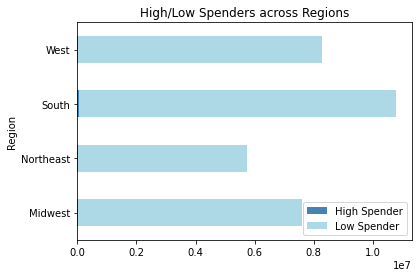

In [46]:
# Create chart to illustrate spending differences and overall customers across regions 

bar_region_H_L_spender = crosstab_region_spender.plot.barh(stacked = True, color = ['steelblue','lightblue'])
plt.legend(loc = 'best')
plt.title('High/Low Spenders across Regions')

In [48]:
# Export chart to folder 

bar_region_H_L_spender.figure.savefig(os.path.join(path,'04 Analysis', 'Visulaisations', 'barh_region_spender'))

In [25]:
# Are there regional differences in how much is spent?

df.groupby('Region')['prices'].sum()

Region
Midwest      59194745.60
Northeast    44531310.36
South        84110453.51
West         64596901.36
Name: prices, dtype: float64

In [26]:
crosstab_region_revenue = pd.crosstab(df['Region'], df['prices'].sum(), dropna = False)
crosstab_region_revenue

col_0,2.524334e+08
Region,
Midwest,7604016
Northeast,5728444
South,10801982
West,8300617


### 04. Create exclusion flag for low-activity customers (<5 orders) and exclude them from the dataframe

In [27]:
# Review columns
pd.options.display.max_columns = None

In [28]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [29]:
df['max_order'].value_counts(dropna = False)

99    1172313
8      812631
6      812072
9      810842
7      804745
       ...   
93      50440
90      48399
97      44969
98      44604
96      40469
Name: max_order, Length: 97, dtype: int64

In [30]:
df['max_order'].describe()

count    3.243506e+07
mean     3.305231e+01
std      2.515463e+01
min      3.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      4.700000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [31]:
# Use max_order to define exclusion flag for Low Activity customers

df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'High Activity'

In [32]:
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Low Activity'

In [33]:
df['exclusion_flag'].value_counts(dropna = False)

High Activity    30993489
Low Activity      1441570
Name: exclusion_flag, dtype: int64

In [34]:
# Review exclusion flag in df

pd.options.display.max_rows = None

In [35]:
df.head(100)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
5,2398795,1,2,3,7,15.0,196,1,1,Soda,77.0,7.0,9.0,Mid range product,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117.0,19.0,3.0,Low range product,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23.0,19.0,4.4,Low range product,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24.0,4.0,10.3,Mid range product,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity


In [36]:
# Create subset of Low Activity customers to export

Low_activity_df = df[df['exclusion_flag'] == 'Low Activity']

In [37]:
# Check subset is as expected 

Low_activity_df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region,exclusion_flag
360,2717275,5,1,3,12,NaN,15349,1,0,Organic Raw Agave Nectar,29.0,13.0,10.7,Mid range product,Most orders,4,New customer,9.189189,Low Spender,11.0,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,Low Activity
361,2717275,5,1,3,12,NaN,21413,2,0,Organic Soba,66.0,6.0,6.7,Mid range product,Most orders,4,New customer,9.189189,Low Spender,11.0,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,Low Activity
362,2717275,5,1,3,12,NaN,48775,3,0,Organic Red Cabbage,83.0,4.0,7.4,Mid range product,Most orders,4,New customer,9.189189,Low Spender,11.0,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,Low Activity
363,2717275,5,1,3,12,NaN,28289,4,0,Organic Shredded Carrots,123.0,4.0,3.2,Low range product,Most orders,4,New customer,9.189189,Low Spender,11.0,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,Low Activity
364,2717275,5,1,3,12,NaN,8518,5,0,Organic Red Onion,83.0,4.0,6.3,Mid range product,Most orders,4,New customer,9.189189,Low Spender,11.0,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,Low Activity


In [38]:
Low_activity_df.shape

(1441570, 30)

In [68]:
# Export to Prepared Data folder

Low_activity_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low_act_cust_excl.pkl'))

### Exclude Low Activity customers from datframe 

In [39]:
df.shape

(32435059, 30)

In [40]:
# Use new exclusion flag to remove low activity customers from df 

df = df[df['exclusion_flag'] == 'High Activity']

In [41]:
df.shape

(30993489, 30)

In [42]:
df['exclusion_flag'].value_counts(dropna = False)

High Activity    30993489
Name: exclusion_flag, dtype: int64

### 05. Creating Customer Profiles

### Age Groups
- 18-34
- 35-49
- 50-64
- 65+

In [43]:
age_range = []

for value in df['Age']:
    if(value >= 18) and (value <=34):
        age_range.append('18-34')
    elif(value >= 35) and (value <=49):
        age_range.append('35-49')
    elif(value >= 50) and (value <=64):
        age_range.append('50-64')
    elif(value >= 65) and (value <100):
        age_range.append('65+')
    else:
        age_range.append('not_in_range')

In [44]:
# Add new column to df 

df['age_range'] = age_range

In [45]:
df['age_range'].value_counts(dropna = False)

18-34    8250019
65+      8202916
35-49    7312751
50-64    7227803
Name: age_range, dtype: int64

### Income Ranges

In [46]:
df['income'].describe()

count    3.099349e+07
mean     9.967349e+04
std      4.313999e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [47]:
df.groupby('age_range').agg({'income':['mean', 'median', 'min', 'max',]})

income                         
                    mean    median    min     max
age_range                                        
18-34       70585.191548   69090.0  25911  396364
35-49       98468.952885   95059.0  25903  592409
50-64      115714.768967  116212.0  29018  591089
65+        115868.249751  116161.0  29001  593901

In [48]:
df.agg({'income':['mean', 'median', 'min', 'max']})

,income
mean,99673.488813
median,96765.000000
min,25903.000000
max,593901.000000


<AxesSubplot:ylabel='Frequency'>

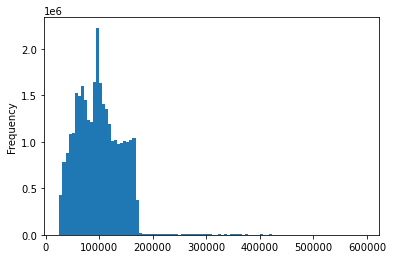

In [80]:
df['income'].plot.hist(bins = 100)

<AxesSubplot:ylabel='Frequency'>

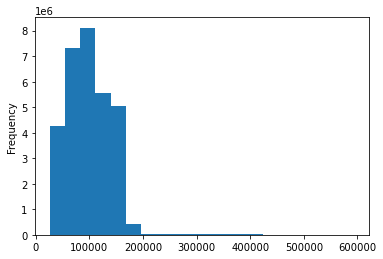

In [81]:
df['income'].plot.hist(bins = 20)

### Defining income ranges
- $25,000 - $67,000 - low income
- $67,000 - $128,000 - average income
- $128,000 - $200,000 - high income
- 200,000+ - very high income

In [49]:
# Create income flag for above ranges

df.loc[(df['income'] > 25000) & (df['income'] <= 67000), 'income_flag'] = 'Low income'
df.loc[(df['income'] > 67000) & (df['income'] <= 128000), 'income_flag'] = 'Average income'
df.loc[(df['income'] > 128000) & (df['income'] <= 200000), 'income_flag'] = 'High income'
df.loc[df['income'] > 200000, 'income_flag'] = 'Very high income'

In [50]:
df['income_flag'].value_counts(dropna = False)

Average income      15564322
Low income           7669062
High income          7505760
Very high income      254345
Name: income_flag, dtype: int64

In [51]:
df.shape

(30993489, 32)

In [52]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region,exclusion_flag,age_range,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income


### Defining Family Status
 - No_of_dependants == 0 & Family_status = divorced/widowed & single  = 'Individual'
 - No_of_dependants >=1 & Family_status = married &b living with parents and siblings = 'Family'

In [53]:
df['Family_status'].value_counts(dropna = False)

married                             21763585
single                               5099384
divorced/widowed                     2647799
living with parents and siblings     1482721
Name: Family_status, dtype: int64

In [54]:
df['No_of_dependants'].value_counts(dropna = False)

3    7779638
0    7747183
2    7740539
1    7726129
Name: No_of_dependants, dtype: int64

In [55]:
df.groupby('Family_status')['No_of_dependants'].value_counts(dropna= False)

Family_status                     No_of_dependants
divorced/widowed                  0                   2647799
living with parents and siblings  1                    508448
                                  3                    489055
                                  2                    485218
married                           3                   7290583
                                  2                   7255321
                                  1                   7217681
single                            0                   5099384
Name: No_of_dependants, dtype: int64

In [56]:
# Derive Family/Indivual flag using loc()

df.loc[(df['No_of_dependants'] > 0) &
       (df['Family_status'] == 'married'), 'Family_flag'] = 'Family'

In [57]:
df.loc[(df['No_of_dependants'] > 0) &
       (df['Family_status'] == 'living with parents and siblings'), 'Family_flag'] = 'Family'

In [58]:
df.loc[(df['No_of_dependants'] == 0) &
       (df['Family_status'] == 'divorced/widowed'), 'Family_flag'] = 'Individual'

In [59]:
df.loc[(df['No_of_dependants'] == 0) &
       (df['Family_status'] == 'single'), 'Family_flag'] = 'Individual'

In [60]:
df['Family_flag'].value_counts(dropna = False)

Family        23246306
Individual     7747183
Name: Family_flag, dtype: int64

In [61]:
df.head()


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region,exclusion_flag,age_range,income_flag,Family_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family


### InstaCart Department insights
- Import departments csv file and create data dictionary for department reference
- Establish profiles based on departments 

In [62]:
# Import departments csv as depts_df

depts_df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [63]:
depts_df.shape

(21, 2)

In [64]:
depts_df.head(20)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
depts_df.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [66]:
depts_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [67]:
dept_dict = depts_df.to_dict('Index')
dept_dict
                    

{0: {'department_id': 1, 'department': 'frozen'},
 1: {'department_id': 2, 'department': 'other'},
 2: {'department_id': 3, 'department': 'bakery'},
 3: {'department_id': 4, 'department': 'produce'},
 4: {'department_id': 5, 'department': 'alcohol'},
 5: {'department_id': 6, 'department': 'international'},
 6: {'department_id': 7, 'department': 'beverages'},
 7: {'department_id': 8, 'department': 'pets'},
 8: {'department_id': 9, 'department': 'dry goods pasta'},
 9: {'department_id': 10, 'department': 'bulk'},
 10: {'department_id': 11, 'department': 'personal care'},
 11: {'department_id': 12, 'department': 'meat seafood'},
 12: {'department_id': 13, 'department': 'pantry'},
 13: {'department_id': 14, 'department': 'breakfast'},
 14: {'department_id': 15, 'department': 'canned goods'},
 15: {'department_id': 16, 'department': 'dairy eggs'},
 16: {'department_id': 17, 'department': 'household'},
 17: {'department_id': 18, 'department': 'babies'},
 18: {'department_id': 19, 'department

In [68]:
df.groupby('department_id').agg({'order_id' :['min', 'max', 'mean']})

order_id                       
                   min      max          mean
department_id                                
1.0                  7  3421083  1.710649e+06
2.0                 79  3421061  1.712991e+06
3.0                  3  3421081  1.710065e+06
4.0                  2  3421083  1.710211e+06
5.0                 13  3421040  1.712249e+06
6.0                  5  3421061  1.707299e+06
7.0                  4  3421081  1.710960e+06
8.0                 12  3421072  1.712261e+06
9.0                  5  3421066  1.710716e+06
10.0                18  3421012  1.716812e+06
11.0                 4  3421079  1.711147e+06
12.0                 3  3421082  1.711955e+06
13.0                 2  3421081  1.711468e+06
14.0                 4  3421082  1.709562e+06
15.0                 9  3421081  1.711621e+06
16.0                 2  3421082  1.709994e+06
17.0                 5  3421083  1.711579e+06
18.0                10  3421083  1.706065e+06
19.0                 4  3421083  1.709401e+06
20.0                 5  3421081  1.709140e+06
21.0               154  3421059  1.717986e+06

In [69]:
dept_dict[11]

{'department_id': 12, 'department': 'meat seafood'}

In [131]:
# Review the product names in each department to determine diet types 
crosstab = pd.crosstab(df['department_id'],
                       df['product_name'], dropna = False)

In [133]:
crosstab.to_clipboard()

### Define Diet flag 
- department_id = 12 then 'Meateater'
- department_id != 12 then 'Vegetarian'
- department_id != 12 & != 16 then 'Vegan'

In [70]:
df.loc[df['department_id'] == 12, 'Diet'] = 'Meateater'

In [71]:
df.loc[df['department_id'] != 12, 'Diet'] = 'Vegetarian'

In [72]:
df.loc[(df['department_id'] != 12) & 
       (df['department_id'] != 16), 'Diet'] = 'Vegan'

In [73]:
df['Diet'].value_counts(dropna = False)

Vegan         25141525
Vegetarian     5177183
Meateater       674781
Name: Diet, dtype: int64

In [74]:
df.shape

(30993489, 34)

In [75]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region,exclusion_flag,age_range,income_flag,Family_flag,Diet
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegetarian
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan


### Create Pet Owner flag 


In [76]:
df.loc[df['department_id'] == 8, 'Pet_owner'] = 'Pets'
df.loc[df['department_id'] != 8, 'Pet_owner'] = 'No pets'

In [77]:
df['Pet_owner'].value_counts(dropna = False)

No pets    30900429
Pets          93060
Name: Pet_owner, dtype: int64

In [78]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region,exclusion_flag,age_range,income_flag,Family_flag,Diet,Pet_owner
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegetarian,No pets
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets


### Weekend vs Weekday ordering habits 
Satuday = 0
Sunday = 1


In [79]:
# Create ordering flag for weekends 
df.loc[df['order_day_of_week'] <=1, 'Weekend_flag'] = 'Weekend'
df.loc[df['order_day_of_week'] >1 , 'Weekend_flag'] = 'Weekday'

In [80]:
df['Weekend_flag'].value_counts(dropna = False)

Weekday    19662347
Weekend    11331142
Name: Weekend_flag, dtype: int64

### Order Time_of_day_flag
- between 0 and 4 'Overnight' 
- between 5 and 9  'Morning'
- between 17 and 18 'Afternoon'
- between 19 and 23 'Evening'
- else 'Peak'

In [81]:
df['order_hour_of_day'].value_counts(dropna = False)

10    2652367
11    2617288
14    2570258
13    2541577
15    2538299
12    2498043
16    2415879
9     2366074
17    1984111
8     1660909
18    1552568
19    1194931
20     931757
7      864083
21     763821
22     607557
23     384839
6      281308
0      208217
1      109706
5       84515
2       65744
4       50803
3       48835
Name: order_hour_of_day, dtype: int64

In [82]:
df.loc[(df['order_hour_of_day'] >=0 ) & 
       (df['order_hour_of_day'] <=4), 'Time_of_day_flag'] = 'Overnight'

In [83]:
df.loc[(df['order_hour_of_day'] >=5 ) & 
       (df['order_hour_of_day'] <=9),'Time_of_day_flag'] = 'Morning'

In [84]:
df.loc[(df['order_hour_of_day'] >=17 ) & 
       (df['order_hour_of_day'] <=18), 'Time_of_day_flag'] = 'Afternoon'

In [85]:
df.loc[(df['order_hour_of_day'] >=19 ) & 
       (df['order_hour_of_day'] <=23), 'Time_of_day_flag'] = 'Evening'

In [86]:
df.loc[(df['order_hour_of_day'] >=10 ) & 
       (df['order_hour_of_day'] <=16), 'Time_of_day_flag'] = 'Peak'

In [87]:
df['Time_of_day_flag'].value_counts(dropna = False)

Peak         17833711
Morning       5256889
Evening       3882905
Afternoon     3536679
Overnight      483305
Name: Time_of_day_flag, dtype: int64

In [88]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,product_price_range,busiest_period_of_day,max_order,loyalty_flag,average_basket_spend,High/Low_Spender,median_order_frequency,Order_frequency_flag,Gender,State,Age,date_joined,No_of_dependants,Family_status,income,Region,exclusion_flag,age_range,income_flag,Family_flag,Diet,Pet_owner,Weekend_flag,Time_of_day_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegetarian,No pets,Weekday,Morning
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low range product,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,18-34,Low income,Family,Vegan,No pets,Weekday,Morning


In [89]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))